In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import numpy as np

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

import networkx as nx

from minimal.imaging import blit_rooms
from minimal.layout import LayoutGraph, NodeType
from minimal.gen import generate_plan, PlanMasks
from minimal import sample_graphs
from minimal.rooms import RoomAreas, extract_rooms, create_orientation_mask
from minimal.walls import find_walls

%matplotlib inline

In [26]:
%%time
pm = PlanMasks.create_from_state(torch.load("data/plan_masks_01.pth"))
rooms = extract_rooms(pm)

CPU times: user 868 ms, sys: 630 µs, total: 869 ms
Wall time: 868 ms


In [40]:
walls_mask, inner_mask = find_walls(rooms)
rect_mask = sum(room.to_mask() * (i + 1) for i, room in enumerate(rooms))

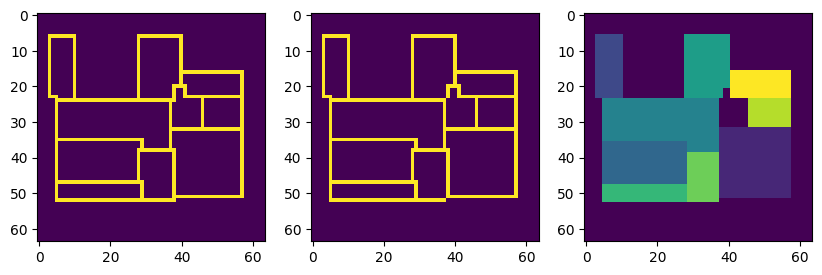

In [65]:
plt.figure(figsize=(10,5))

plt.subplot(131)
plt.imshow(walls_mask)

plt.subplot(132)
plt.imshow(walls_mask * inner_mask)

plt.subplot(133)
plt.imshow(rect_mask)

In [54]:
from minimal.rooms import create_orientation_mask
orient_mask = create_orientation_mask(rooms, walls_mask)

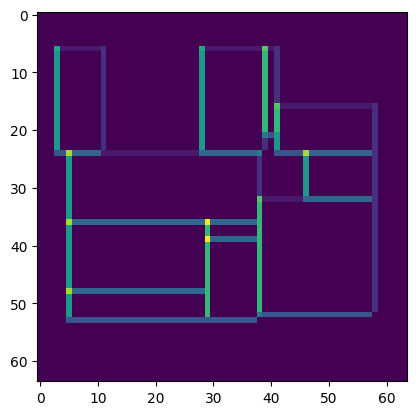

In [55]:
plt.imshow(orient_mask)